당뇨병 데이터 셋 - 다중회귀
0) feature 영향
1) test-size = 0.1
2) Linear Regression vs DecisionTreeRegressor
3) Model 성능 MSE

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [44]:
features = df.columns[0:-1]
print(features)

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')


In [45]:
#sns.regplot(x='bmi', y='target', data=df)
#plt.show()

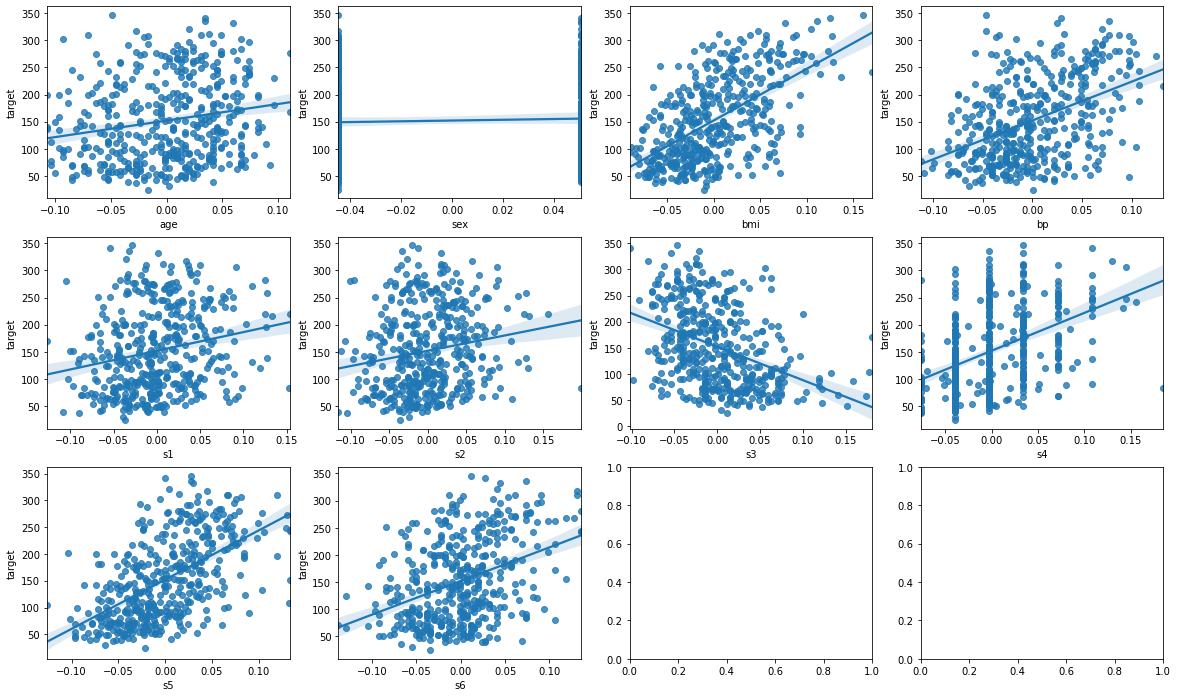

In [46]:
fig, axis = plt.subplots(nrows=3, ncols=4, figsize=(20,12))
for i, feature in enumerate(features):
    row, col = i//4, i%4
    sns.regplot(x=feature, y='target', data=df, ax=axis[row][col])

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
# y = diabetes.target
# X = df['bmi'].values.reshape(-1,1)
# lr = LinearRegression()
# lr.fit(X, y)
# lr.score(X, y)

In [49]:
y = diabetes.target
for feature in diabetes.feature_names:
    X = df[feature].values.reshape(-1,1)
    lr = LinearRegression()
    lr.fit(X, y)
    r2 = lr.score(X, y)
    print(f'{feature}:\t{r2:.4f}')

age:	0.0353
sex:	0.0019
bmi:	0.3439
bp:	0.1949
s1:	0.0450
s2:	0.0303
s3:	0.1559
s4:	0.1853
s5:	0.3202
s6:	0.1463


In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=2021
)

In [51]:
lr2 = LinearRegression()
lr2.fit(X_train, y_train)

LinearRegression()

In [52]:
pred = lr2.predict(X_test)

In [53]:
lr2.score(X_test, y_test)

0.12182329052160201

In [55]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [56]:
pred2 = dtr.predict(X_test)

In [59]:
dtr.score(X_test, y_test)

0.06855350357481471

In [60]:
params = {
    'max_depth': [2,3,4,5,6,7,8]
}

In [61]:
from sklearn.model_selection import GridSearchCV

grid_dt = GridSearchCV(dtr, param_grid=params, scoring='neg_mean_squared_error', cv=3)
grid_dt.fit(X_train, y_train)

C:\Users\ICT01_15\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass sample_weight=[288.  64. 181. 258.  71.  42. 297.  89. 160. 150. 225. 265.  59. 123.
 258. 229. 202.  55.  77.  96.  83. 230. 233.  96. 220. 303. 268. 180.
 170. 171. 178.  87. 310.  84. 257. 232. 111.  91. 293. 185.  77.  93.
 265.  68. 132. 158.  75. 189. 172. 134. 107.  45.  84. 310. 249. 199.
 138.  90.  75. 198.  59.  25.  95. 179. 161. 131. 214.  98. 127. 233.
 168. 268. 103.  72. 141. 265. 275. 200. 178. 138. 118. 196.  89. 146.
 118. 281. 252.  47. 306.  61. 140.  39. 232. 182. 153. 280. 122. 202.
 219.  61. 225. 143.  66. 230.  71. 145.  85.  90.  47. 114. 262.  55.
  77. 236. 175. 241.  73. 126. 124.  65.  49. 155. 202. 151. 104.  90.
  68. 111. 113. 263. 170. 259. 160.] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\ICT01_15\anaconda3\lib

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8]},
             scoring=<function mean_squared_error at 0x00000256624C4B80>)

In [62]:
grid_dt.best_params_

{'max_depth': 2}

In [63]:
best_dt = grid_dt.best_estimator_
best_dt.score(X_test, y_test)

0.08419768022211016

In [64]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, pred)
mse2 = mean_squared_error(y_test, pred2)
mse, mse2

(3825.0758113113457, 4057.1031143867044)